In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_and_analyze_netcdf(file_path):
    # Open NetCDF dataset
    ds = xr.open_dataset(file_path)
    
    # Convert to DataFrame, reset index for flat structure
    df = ds.to_dataframe().reset_index()
    
    # Optional: Basic data cleaning and preparation
    # Remove any columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Optional: Basic statistical summary
    print("DataFrame Basic Info:")
    print(df.info())
    
    return df

In [5]:
df=load_and_analyze_netcdf("data\ROMS_25_08_2024_to_03_09_2024.nc")

MemoryError: Unable to allocate 475. MiB for an array with shape (777600, 80) and data type int64

In [4]:
print(df.head(100))

     LON      LAT  DEPTH1_1               TAXIS  USURF  VSURF  SST
0   30.0 -30.0000       0.0 2024-08-25 01:30:00    NaN    NaN  NaN
1   30.0 -30.0000       0.0 2024-08-25 04:30:00    NaN    NaN  NaN
2   30.0 -30.0000       0.0 2024-08-25 07:30:00    NaN    NaN  NaN
3   30.0 -30.0000       0.0 2024-08-25 10:30:00    NaN    NaN  NaN
4   30.0 -30.0000       0.0 2024-08-25 13:30:00    NaN    NaN  NaN
..   ...      ...       ...                 ...    ...    ...  ...
95  30.0 -29.9167       0.0 2024-08-26 22:30:00    NaN    NaN  NaN
96  30.0 -29.9167       0.0 2024-08-27 01:30:00    NaN    NaN  NaN
97  30.0 -29.9167       0.0 2024-08-27 04:30:00    NaN    NaN  NaN
98  30.0 -29.9167       0.0 2024-08-27 07:30:00    NaN    NaN  NaN
99  30.0 -29.9167       0.0 2024-08-27 10:30:00    NaN    NaN  NaN

[100 rows x 7 columns]


In [5]:
def print_attribute_ranges(df):
    """
    Prints the range (minimum and maximum) of each attribute in the DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    print("Attribute Ranges:")
    for column in df.columns:
        if df[column].dtype in ['float64', 'float32', 'int64', 'int32', 'datetime64[ns]']:
            min_val = df[column].min()
            max_val = df[column].max()
            print(f"{column}: Min = {min_val}, Max = {max_val}")
        elif df[column].dtype == 'object':
            print(f"{column}: Unique Values = {df[column].nunique()}")
        else:
            print(f"{column}: Data type = {df[column].dtype}, cannot compute range")

# Usage example:
# Assuming `df` is your DataFrame
print_attribute_ranges(df)


Attribute Ranges:
LON: Min = 30.0, Max = 119.8807
LAT: Min = -30.0, Max = 29.892699999999998
DEPTH1_1: Min = 0.0, Max = 0.0
TAXIS: Min = 2024-08-25 01:30:00, Max = 2024-09-03 22:30:00
USURF: Min = -1.8160749673843384, Max = 2.6572890281677246
VSURF: Min = -2.4239048957824707, Max = 2.3804280757904053
SST: Min = 16.062036514282227, Max = 35.810184478759766


In [6]:
import pandas as pd

def extract_data(input_df, target_time):
    """
    Extracts relevant data rows from a DataFrame based on a target timestamp.

    Args:
        input_df (pd.DataFrame): The input DataFrame.
        target_time (str): The target timestamp to filter the data.

    Returns:
        pd.DataFrame: The filtered DataFrame containing the relevant data.
    """
    # Print available columns and first few rows for debugging
    print("Available Columns:", list(input_df.columns))
    print("\nFirst few rows:\n", input_df.head())

    # Check the actual format of the timestamp column
    print("\nTimestamp Column Format:")
    print(input_df['TAXIS'].dtype)
    print("\nUnique Timestamps:\n", input_df['TAXIS'].unique()[:10])

    # Attempt different filtering methods
    # Method 1: Direct comparison
    filtered_df = input_df[input_df['TAXIS'] == target_time]

    # Method 2: String parsing
    if len(filtered_df) == 0:
        filtered_df = input_df[input_df['TAXIS'].astype(str) == str(target_time)]

    # Print filtering results
    print(f"\nFiltered rows count: {len(filtered_df)}")

    # Select the relevant columns
    columns_to_extract = ['LON', 'LAT', 'DEPTH1_1', 'USURF', 'VSURF', 'SST']

    # Check if all columns exist
    missing_columns = [col for col in columns_to_extract if col not in input_df.columns]
    if missing_columns:
        print(f"Warning: Columns {missing_columns} not found in the dataset")
        columns_to_extract = [col for col in columns_to_extract if col in input_df.columns]

    # Extract the required columns
    extracted_data = filtered_df[columns_to_extract]

    # Return the filtered DataFrame
    return extracted_data


In [7]:
target_time = '2024-08-25 01:30:00'

# Process the DataFrame
filtered_df = extract_data(df, target_time)

# Save to a CSV file if needed
output_file = 'roms_data.csv'
if not filtered_df.empty:
    filtered_df.to_csv(output_file, index=False)
    print(f"Data saved to {output_file}")
else:
    print("No matching data found.")

Available Columns: ['LON', 'LAT', 'DEPTH1_1', 'TAXIS', 'USURF', 'VSURF', 'SST']

First few rows:
     LON   LAT  DEPTH1_1               TAXIS  USURF  VSURF  SST
0  30.0 -30.0       0.0 2024-08-25 01:30:00    NaN    NaN  NaN
1  30.0 -30.0       0.0 2024-08-25 04:30:00    NaN    NaN  NaN
2  30.0 -30.0       0.0 2024-08-25 07:30:00    NaN    NaN  NaN
3  30.0 -30.0       0.0 2024-08-25 10:30:00    NaN    NaN  NaN
4  30.0 -30.0       0.0 2024-08-25 13:30:00    NaN    NaN  NaN

Timestamp Column Format:
datetime64[ns]

Unique Timestamps:
 <DatetimeArray>
['2024-08-25 01:30:00', '2024-08-25 04:30:00', '2024-08-25 07:30:00',
 '2024-08-25 10:30:00', '2024-08-25 13:30:00', '2024-08-25 16:30:00',
 '2024-08-25 19:30:00', '2024-08-25 22:30:00', '2024-08-26 01:30:00',
 '2024-08-26 04:30:00']
Length: 10, dtype: datetime64[ns]

Filtered rows count: 777600
Data saved to roms_data.csv


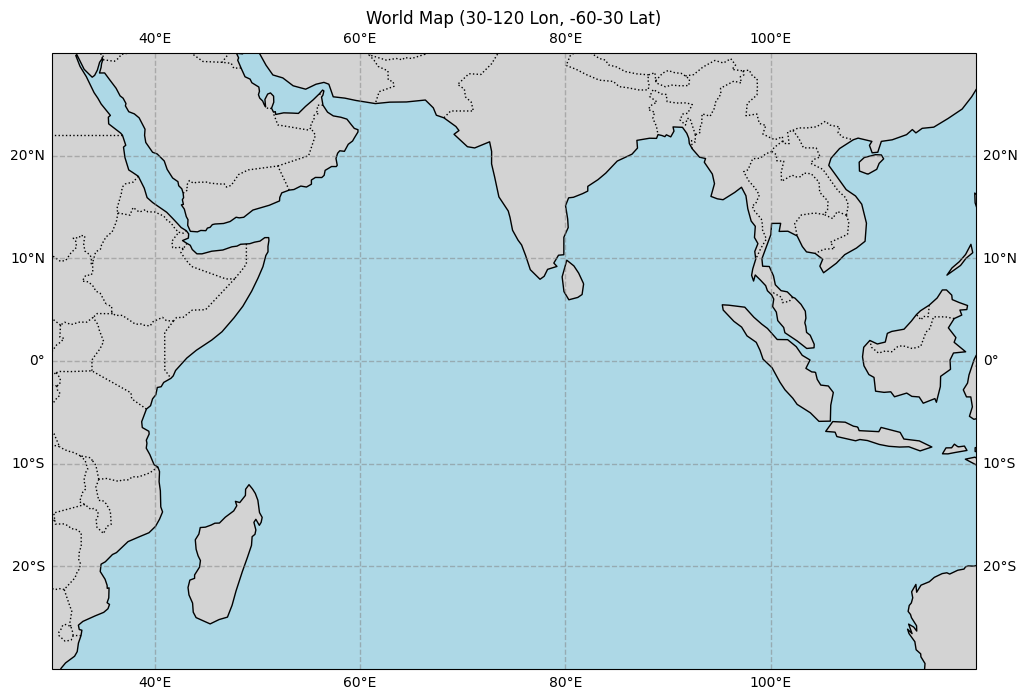

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_world_map():
    # Create a map projection
    fig, ax = plt.subplots(figsize=(12, 8), 
                            subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Set map extent
    ax.set_extent([30, 120, -30, 30], crs=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Add gridlines
    ax.gridlines(draw_labels=True, linewidth=1, color='gray', 
                 alpha=0.5, linestyle='--')
    
    plt.title('World Map (30-120 Lon, -60-30 Lat)')
    plt.show()

# Execute the plot
plot_world_map()

In [6]:
csv_path = "roms_data.csv"
data = pd.read_csv(csv_path)

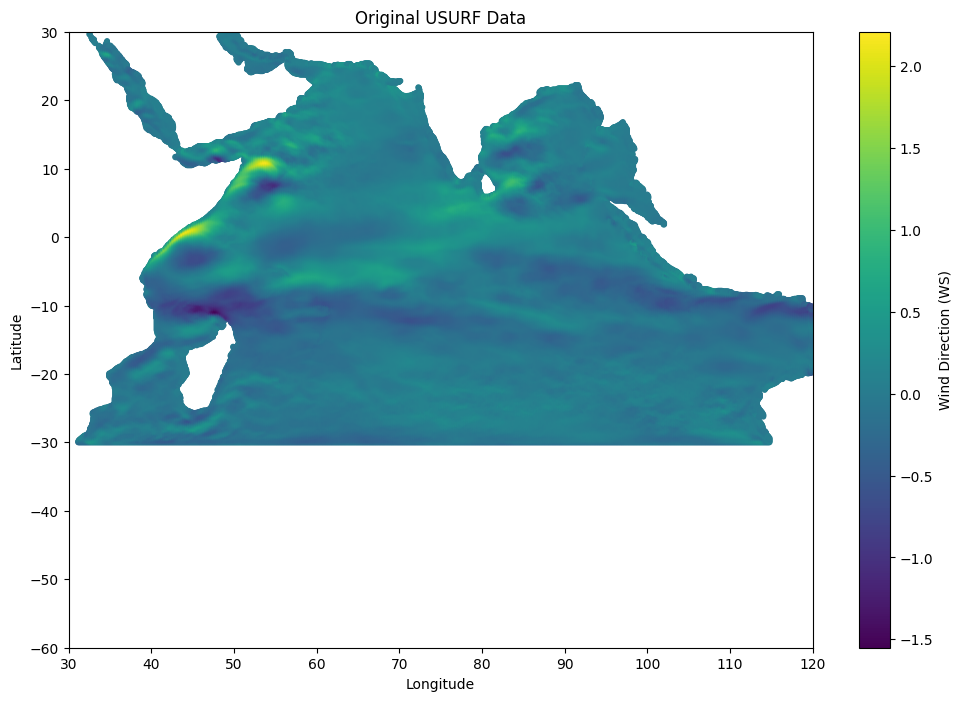

In [8]:
# Load data
import pandas as pd



# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['LON'], data['LAT'], 
                      c=data['USURF'], 
                      cmap='viridis', 
                      s=10)  # size of points
plt.colorbar(scatter, label='Wind Direction (WS)')
plt.title('Original USURF Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(30, 120)
plt.ylim(-60, 30)
plt.show()

In [68]:
import numpy as np
import pandas as pd

def dataframe_to_matrix(dataframe, lat_range, lon_range, resolution=0.083):
    """
    Converts a DataFrame with latitudes, longitudes, and values to a 2D matrix.

    Args:
        dataframe (pd.DataFrame): DataFrame with 'LAT', 'LON', and value columns.
        lat_range (tuple): Latitude range (min, max).
        lon_range (tuple): Longitude range (min, max).
        resolution (float): Resolution of the grid.

    Returns:
        np.ndarray: 2D matrix of values with missing data defaulted to 0.
    """
    lat_min, lat_max = lat_range
    lon_min, lon_max = lon_range

    # Calculate grid dimensions
    num_rows = int((lat_max - lat_min) / resolution)
    num_cols = int((lon_max - lon_min) / resolution)

    # Initialize matrix with zeros
    matrix = np.zeros((num_rows, num_cols))

    # Map DataFrame values to the matrix
    for _, row in dataframe.iterrows():
        lat, lon, value = row['LAT'], row['LON'], row['USURF']

        # Skip rows with invalid or out-of-range lat/lon
        if not (lat_min <= lat <= lat_max and lon_min <= lon <= lon_max):
            continue

        # Calculate indices
        lat_idx = int((lat - lat_min) / resolution)
        lon_idx = int((lon - lon_min) / resolution)

        # Assign the value to the matrix
        matrix[lat_idx, lon_idx] = value

    return matrix

def average_pooling(matrix, output_shape):
    """
    Applies average pooling to a 2D matrix.

    Args:
        matrix (np.ndarray): Input 2D matrix.
        output_shape (tuple): Desired output shape (rows, cols).

    Returns:
        np.ndarray: Averaged down-sampled matrix.
    """
    input_rows, input_cols = matrix.shape
    output_rows, output_cols = output_shape

    row_scale = input_rows // output_rows
    col_scale = input_cols // output_cols

    pooled_matrix = np.zeros((output_rows, output_cols))
    for i in range(output_rows):
        for j in range(output_cols):
            pooled_matrix[i, j] = np.mean(
                matrix[i * row_scale:(i + 1) * row_scale, j * col_scale:(j + 1) * col_scale]
            )

    return pooled_matrix


lat_range = (-30, 30)
lon_range = (30, 120)

# Step 1: Convert DataFrame to 2D matrix
matrix = dataframe_to_matrix(data, lat_range, lon_range)

# Step 2: Perform average pooling
pooled_matrix = average_pooling(matrix, output_shape=(600, 900))

print("Original Matrix Shape:", matrix.shape)
print("Pooled Matrix Shape:", pooled_matrix.shape)


Original Matrix Shape: (722, 1084)
Pooled Matrix Shape: (600, 900)


In [69]:
matrix

array([[nan, nan, nan, ..., nan, nan,  0.],
       [nan, nan, nan, ..., nan, nan,  0.],
       [nan, nan, nan, ..., nan, nan,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan,  0.],
       [nan, nan, nan, ..., nan, nan,  0.],
       [nan, nan, nan, ..., nan, nan,  0.]])

In [70]:
flipped_grid_data = np.flipud(pooled_matrix)

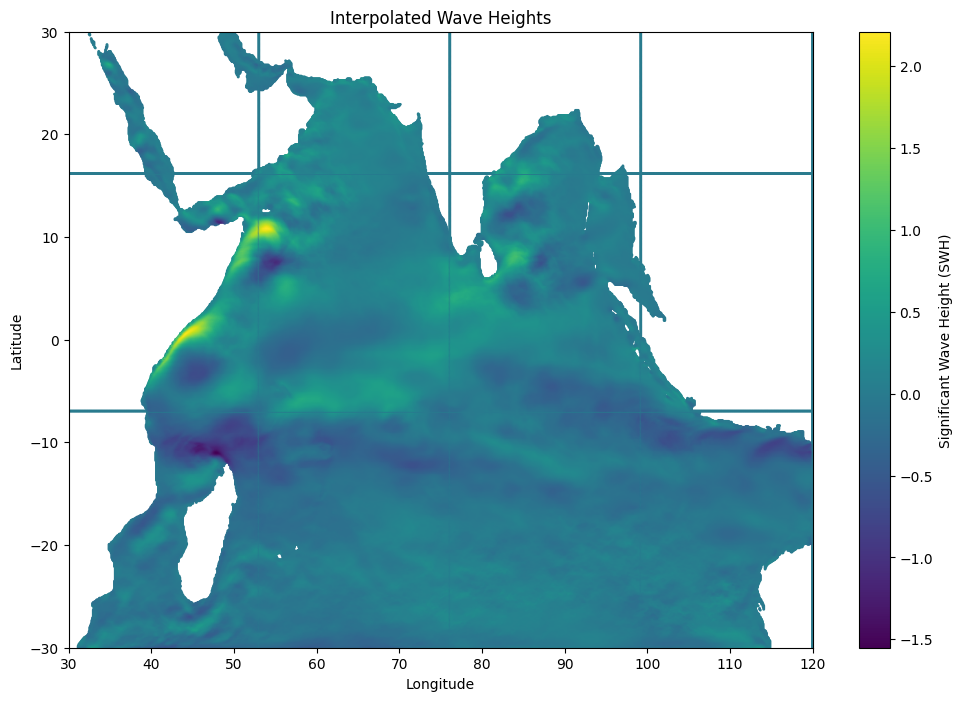

In [71]:
# Generate grid for latitudes and longitudes based on the matrix shape
lat_min, lat_max = lat_range
lon_min, lon_max = lon_range
resolution = 0.083

grid_lat = np.linspace(lat_min, lat_max, matrix.shape[0])
grid_lon = np.linspace(lon_min, lon_max, matrix.shape[1])

# Create meshgrid for plotting
lon_mesh, lat_mesh = np.meshgrid(grid_lon, grid_lat)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(lon_mesh, lat_mesh, 
                      c=matrix.ravel(),
                      cmap='viridis', 
                      s=1)  # smaller point size due to more points
plt.colorbar(scatter, label='Significant Wave Height (SWH)')
plt.title('Interpolated Wave Heights')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(30, 120)
plt.ylim(-30, 30)
plt.show()

In [72]:
def expand_matrix_to_square(matrix, target_size):
    """
    Expands a rectangular matrix to a square matrix of the given size by padding with zeros.

    Args:
        matrix (np.ndarray): Input matrix to be expanded.
        target_size (int): Desired size of the square matrix.

    Returns:
        np.ndarray: Square matrix with original values and zero padding.
    """
    original_rows, original_cols = matrix.shape
    if original_rows > target_size or original_cols > target_size:
        raise ValueError("Target size must be greater than or equal to the original dimensions.")

    # Initialize a zero-filled matrix of the target size
    expanded_matrix = np.zeros((target_size, target_size))

    # Copy the original matrix into the top-left corner
    expanded_matrix[:original_rows, :original_cols] = matrix

    return expanded_matrix


# Expand pooled_matrix to 900x900
expanded_pooled_matrix = expand_matrix_to_square(flipped_grid_data, 900)

# Check the shapes
print("Original Pooled Matrix Shape:", pooled_matrix.shape)
print("Expanded Pooled Matrix Shape:", expanded_pooled_matrix.shape)


Original Pooled Matrix Shape: (600, 900)
Expanded Pooled Matrix Shape: (900, 900)


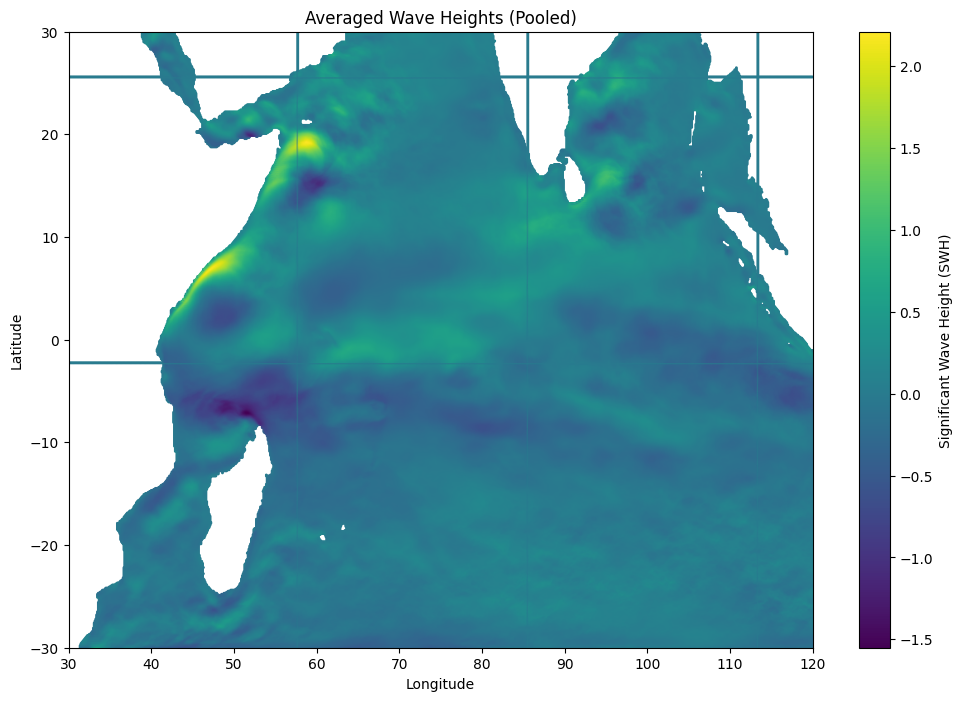

In [73]:
# Calculate new resolution for pooled_matrix
pooled_lat_res = (lat_range[1] - lat_range[0]) / pooled_matrix.shape[0]
pooled_lon_res = (lon_range[1] - lon_range[0]) / pooled_matrix.shape[1]

# Generate grid for pooled latitudes and longitudes
pooled_grid_lat = np.linspace(lat_range[0], lat_range[1], pooled_matrix.shape[0])
pooled_grid_lon = np.linspace(lon_range[0], lon_range[1], pooled_matrix.shape[1])

# Create meshgrid for plotting pooled_matrix
pooled_lon_mesh, pooled_lat_mesh = np.meshgrid(pooled_grid_lon, pooled_grid_lat)

# Plot the pooled_matrix as a scatter plot
plt.figure(figsize=(12, 8))
pooled_scatter = plt.scatter(pooled_lon_mesh, pooled_lat_mesh, 
                             c=pooled_matrix.ravel(),  # Flatten pooled matrix for scatter plot
                             cmap='viridis', 
                             s=1)  # Smaller point size for dense grid
plt.colorbar(pooled_scatter, label='Significant Wave Height (SWH)')
plt.title('Averaged Wave Heights (Pooled)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(lon_range[0], lon_range[1])
plt.ylim(lat_range[0], lat_range[1])
plt.show()


In [74]:
expanded_pooled_matrix.shape


(900, 900)

In [75]:
npy_file_path = "usurf_data.npy"
np.save(npy_file_path, expanded_pooled_matrix)
print(f"Flipped grid data saved to {npy_file_path}")

Flipped grid data saved to usurf_data.npy


In [77]:
loaded_data = np.load("usurf_data.npy")
print(loaded_data)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
